# Aspheric lens


In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'

from pprint import pprint

In [2]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

from diffractio.utils_math import ndgrid

import matplotlib.cm as cm

## Wessenplatten Goncharov

In [3]:
#constantes (paper Goncharov)
n1=-0.0019508
n2=-0.000009
n3=0.0419020
n4=-0.008509
n5=-0.002007
n6=0.0003663




def local_maxima(array, min_distance = 1, periodic=False, edges_allowed=True): 
    """Find all local maxima of the array, separated by at least min_distance."""
    #da los índices como resultado
    array = np.asarray(array)
    cval = 0 
    if periodic: 
        mode = 'wrap' 
    elif edges_allowed: 
        mode = 'nearest' 
    else: 
        mode = 'constant' 
    cval = array.max()+1 
    max_points = array == ndimage.maximum_filter(array, 1+2*min_distance, mode=mode, cval=cval) 
    return [indices[max_points] for indices in np.indices(array.shape)]


In [4]:
x0 = sp.linspace(-5*mm, 5*mm, 1024*2)
z0 = sp.linspace(0 * mm, 10*mm, 1024*1)
wavelength = 550 * nm

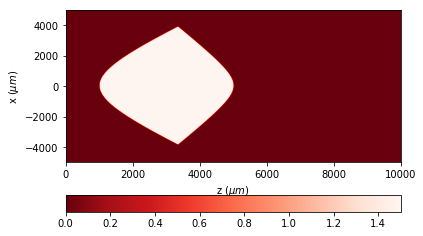

In [5]:
e1 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')

ipasa1=e1.aspheric_surface_z(r0=(0,1*mm), refraction_index=1.5, cx=1/(2*mm), Qx=-2,
                             a2=0, a3=0, a4=0, angle=(0,(0,0)), side='right')

ipasa2=e1.aspheric_surface_z(r0=(0,5*mm), refraction_index=1.5, cx=1/(-2*mm), Qx=2,
                             a2=0, a3=0, a4=0, angle=(0,(0,0)), side='left')

e1.n=sp.zeros_like(e1.n)
e1.n[ipasa1*ipasa2]=1.5

e1.draw_refraction_index(draw_borders=False, colorbar_kind='horizontal')


### Lente

In [6]:
x0 = sp.linspace(-1.5*mm, 1.5*mm, 1024*2)
z0 = sp.linspace(-0.1 * mm, 5*mm, 1024*2)
wavelength = 5*550 * nm

In [7]:
lente2 = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds= lente2.aspheric_lens(r0=(0*mm,0*mm), angle=(0*degrees, (0*mm,0*mm)), 
                                   refraction_index=1.5, 
                                   cx=(1/(3*mm),-1/(1*mm)),Qx=(0,0), 
                                   a2=(0,1e-13), a3=(0,0), a4=(0,0),
                                   depth=1*mm,  size=2.5*mm)

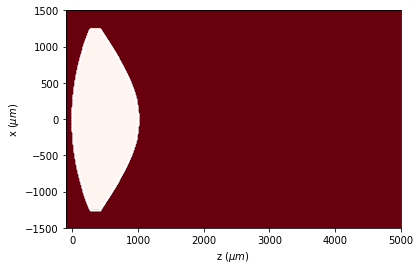

In [8]:
lente2.draw_refraction_index(draw_borders=True, min_incr=0.01)

In [9]:
# funciona mal 190320
lente2.filter_refraction_index(pixels_filtering=200, draw_check=False)

(83.30078125, array([0., 0., 0., ..., 0., 0., 0.]))

In [10]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
lente2.incident_field(u0)

In [11]:
lente2.clear_field()
lente2.BPM(verbose=False)

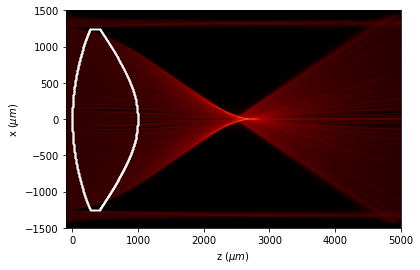

In [12]:
lente2.draw(logarithm=True, normalize='maximum', draw_borders=True)

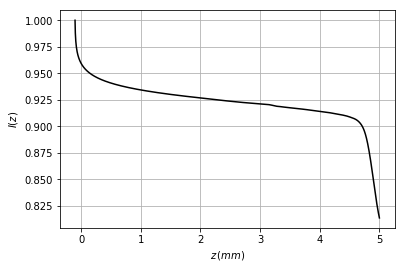

In [13]:
lente2.check_intensity();

In [14]:
x_f,z_f = lente2.search_focus()

x = 0.7327796775769002 um, z = 2682.9506595017097 um


(1800.0, 2800.0)

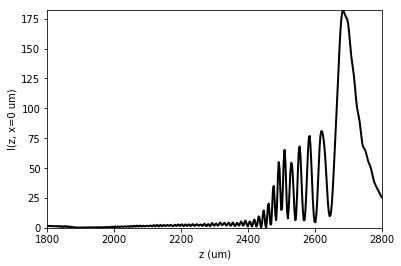

In [15]:
lente2.profile_longitudinal(kind='intensity', logarithm=False, x0=x_f)
plt.xlim(1.8*mm, 2.8*mm)

(-20, 20)

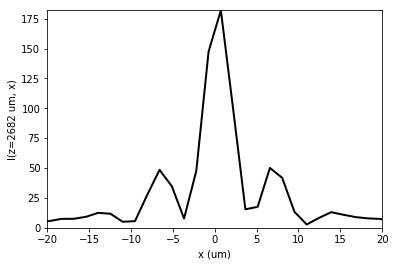

In [16]:
lente2.profile_transversal(kind='intensity', logarithm=False, z0=z_f)
plt.xlim(-20,20)